클러스터별 평균값:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.649075          0.455418    -0.759620       -0.230401  -0.189454   
1       1.003989         -0.685689     1.020772        0.031050   0.276163   
2      -0.094321          0.041076     0.096048        0.402034  -0.004928   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.226387             -0.351925 -0.450675  0.613254  -0.288718   
1            -0.476860             -0.481687  0.438441 -0.752072   0.554620   
2             1.074228              1.322391  0.280773 -0.173946  -0.186573   

    alcohol  
0  0.066703  
1  0.282591  
2 -0.506721  

클러스터별 품질 분포:
 quality    3     4      5      6      7     8
cluster                                      
0        7.0  38.0  303.0  304.0   63.0   7.0
1        3.0   9.0  135.0  223.0  122.0  10.0
2        NaN   6.0  243.0  111.0   14.0   1.0


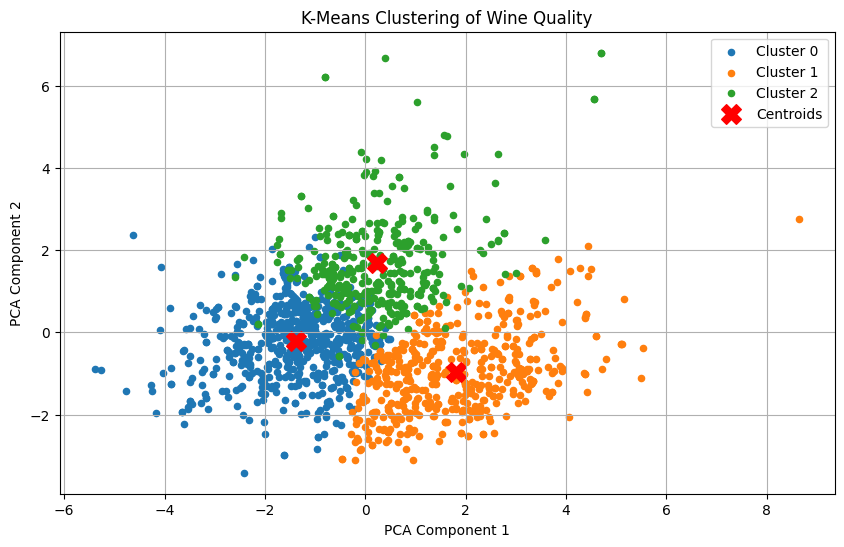

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv("winequality-red.csv")

# 2. 주요 특성 선택 (quality 제외)
features = df.drop("quality", axis=1)

# 3. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 4. KMeans 클러스터링 (클러스터 수 = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# 5. 각 클러스터의 평균값으로 특성 비교
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print("클러스터별 평균값:\n", cluster_centers)

# 6. 클러스터별 품질 분포 확인
print("\n클러스터별 품질 분포:\n", df.groupby("cluster")["quality"].value_counts().unstack())

# 7. PCA로 2차원 축소 후 시각화
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Cluster 0, 1, 2 색상
for i in range(3):
    plt.scatter(df[df["cluster"] == i]["PCA1"], df[df["cluster"] == i]["PCA2"],
                s=20, c=colors[i], label=f"Cluster {i}")

# 중심점 표시
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering of Wine Quality")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
